In [1]:
from sklearn import datasets

In [2]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import names

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# .map('{:,.2f}'.format) - - - for big numbers

In [3]:
city_wage_data = pd.read_csv('/Users/jakemeissner/Documents/datasets/livingwage (2).csv')
city_wage_data.head()

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40
1,2,Los Angeles,California,3898747,3792621,469.5,8304,19.22,41.55,51.30,67.56,31.01,37.96,41.94,47.75,14.62,22.36,27.73,34.01
2,3,Chicago,Illinois,2746388,2695598,227.7,12061,16.08,32.25,40.20,51.69,25.41,29.73,33.38,35.93,12.28,17.52,22.01,25.94
3,4,Houston,Texas,2304580,2099451,640.4,3599,14.29,29.09,35.73,46.02,22.88,27.54,30.93,33.69,11.14,15.85,19.63,23.09
4,5,Phoenix,Arizona,1608139,1445632,518.0,3105,15.41,29.44,35.40,46.01,24.85,29.25,32.98,36.95,12.03,16.21,19.65,23.23


In [4]:
city_wage_data.sort_values('density')

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
71,72,Anchorage,Alaska,291247,291826,1706.8,171,14.93,29.65,36.98,49.02,23.03,27.81,31.36,35.44,11.33,16.24,20.35,24.72
89,90,Chesapeake,Virginia,249422,222209,338.5,737,16.33,31.67,39.23,51.23,24.57,29.51,33.12,36.61,12.28,17.22,21.49,25.70
21,22,Oklahoma City,Oklahoma,681054,579999,606.2,1123,14.11,28.92,35.77,46.04,22.96,27.49,31.10,33.56,11.35,15.85,19.77,23.11
56,57,Lexington,Kentucky,322570,295803,283.6,1137,13.88,29.36,36.99,48.06,22.65,27.28,30.92,33.47,11.03,16.08,20.39,24.12
11,12,Jacksonville,Florida,949611,821784,747.3,1271,13.48,29.61,36.72,47.10,23.02,27.58,30.98,33.34,10.94,16.11,20.13,23.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,62,Newark,New Jersey,311549,277140,24.1,12927,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40
23,24,Boston,Massachusetts,675647,617594,48.3,13989,19.17,39.08,50.21,65.93,27.79,33.14,36.55,40.54,13.35,20.88,26.89,33.19
16,17,San Francisco,California,873965,805235,46.9,18635,22.88,48.61,60.41,80.09,35.48,42.97,46.95,54.12,16.23,25.89,32.29,40.28
70,71,Jersey City,New Jersey,292449,247597,14.7,19894,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40


In [5]:
city_wage_data.sort_values('density',ascending=False)[:20]

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40
70,71,Jersey City,New Jersey,292449,247597,14.7,19894,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40
16,17,San Francisco,California,873965,805235,46.9,18635,22.88,48.61,60.41,80.09,35.48,42.97,46.95,54.12,16.23,25.89,32.29,40.28
23,24,Boston,Massachusetts,675647,617594,48.3,13989,19.17,39.08,50.21,65.93,27.79,33.14,36.55,40.54,13.35,20.88,26.89,33.19
61,62,Newark,New Jersey,311549,277140,24.1,12927,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40
43,44,Miami,Florida,442241,399457,36.0,12284,15.86,33.20,40.47,52.69,25.54,31.01,34.41,38.46,12.13,17.90,22.00,26.43
2,3,Chicago,Illinois,2746388,2695598,227.7,12061,16.08,32.25,40.20,51.69,25.41,29.73,33.38,35.93,12.28,17.52,22.01,25.94
5,6,Philadelphia,Pennsylvania,1603797,1526006,134.4,11933,14.47,30.17,38.31,49.53,22.94,27.23,30.64,33.12,10.97,16.42,20.95,25.00
63,64,Santa Ana,California,310227,324528,27.3,11364,22.44,45.36,55.85,74.15,34.10,41.01,44.99,52.08,17.05,24.26,30.01,37.31
19,20,Washington,District of Columbia,689545,601723,61.1,11286,19.97,38.95,48.99,63.96,29.61,34.55,38.32,42.24,14.37,20.92,26.46,32.07


In [6]:
city_wage_data.sort_values('density',ascending=False)[:20]['density']

0     29298
70    19894
16    18635
23    13989
61    12927
43    12284
2     12061
5     11933
63    11364
19    11286
41     9206
17     8795
1      8304
45     7962
44     7883
29     7240
55     6895
75     6890
30     6000
62     5991
Name: density, dtype: int64

<BarContainer object of 20 artists>

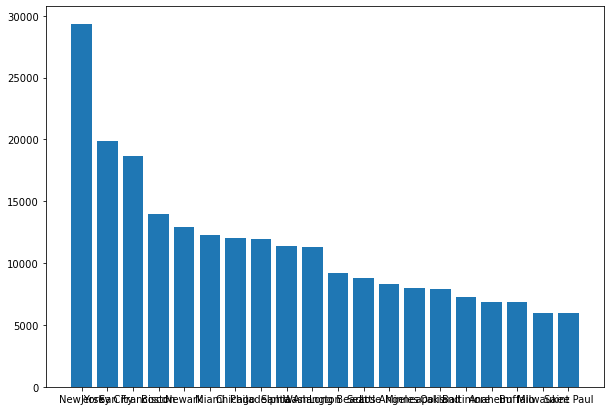

In [7]:
plt.figure(figsize=(10,7))

plt.bar(x=city_wage_data.sort_values('density',ascending=False)[:20]['city'], height=city_wage_data.sort_values('density',ascending=False)[:20]['density'])

Text(0, 0.5, 'Density (people per square mile)')

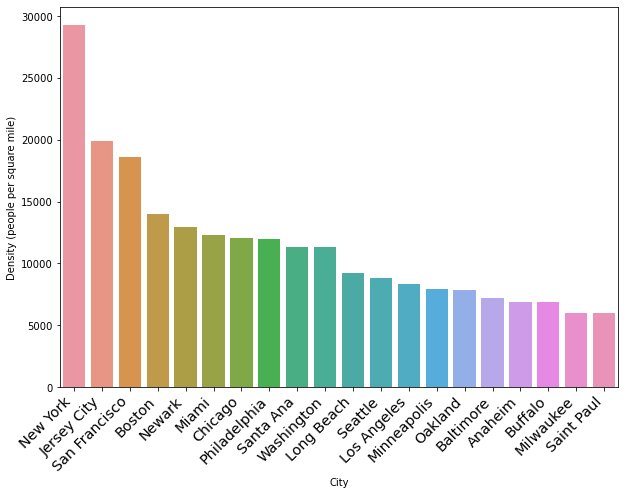

In [8]:
plt.figure(figsize=(10,7))

sns.barplot(x=city_wage_data.sort_values('density',ascending=False)[:20]['city'], y=city_wage_data.sort_values('density',ascending=False)[:20]['density'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('City')
plt.ylabel('Density (people per square mile)')

Text(0, 0.5, 'Density (people per square mile)')

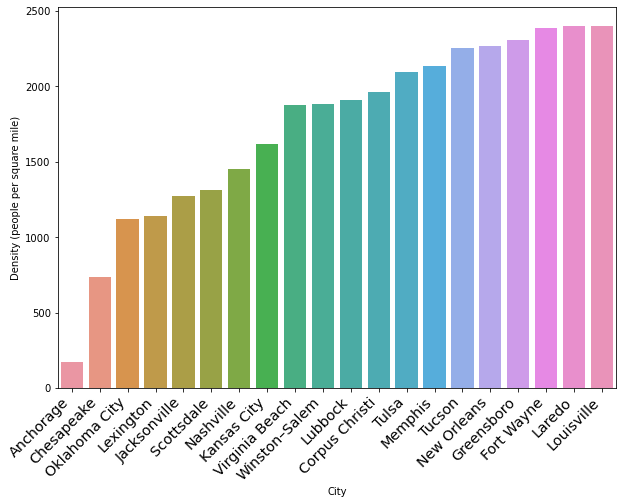

In [9]:
plt.figure(figsize=(10,7))

sns.barplot(x=city_wage_data.sort_values('density',ascending=True)[:20]['city'], y=city_wage_data.sort_values('density',ascending=True)[:20]['density'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('City')
plt.ylabel('Density (people per square mile)')

In [10]:
round(city_wage_data.corr()*100, 2)

,rank_2020,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
rank_2020,100.00,-51.75,-51.30,-34.18,-26.66,-11.65,-13.48,-14.25,-13.98,-11.06,-10.89,-10.45,-9.75,-3.97,-13.06,-13.88,-13.85
population_2020,-51.75,100.00,99.90,24.49,57.93,18.49,16.11,16.52,15.66,15.21,14.07,13.83,12.64,12.33,15.81,16.23,15.72
population_2010,-51.30,99.90,100.00,24.11,58.15,18.10,16.14,16.65,15.81,15.03,13.96,13.74,12.50,12.05,15.85,16.38,15.86
land_area_sqmi,-34.18,24.49,24.11,100.00,-24.65,-17.50,-20.40,-21.59,-21.33,-19.70,-18.44,-18.82,-17.43,-20.39,-20.55,-21.86,-21.32
density,-26.66,57.93,58.15,-24.65,100.00,53.80,51.79,53.84,52.99,48.18,45.72,45.32,43.60,44.17,51.26,53.37,53.11
one_adult_no_kids_living_wage,-11.65,18.49,18.10,-17.50,53.80,100.00,95.85,93.42,92.70,97.54,96.28,95.93,95.39,97.40,95.70,93.23,92.72
one_adult_one_kid_living_wage,-13.48,16.11,16.14,-20.40,51.79,95.85,100.00,99.27,98.85,98.01,98.05,97.96,96.90,96.17,99.97,99.24,98.83
one_adult_two_kids_living_wage,-14.25,16.52,16.65,-21.59,53.84,93.42,99.27,100.00,99.81,95.31,95.10,95.08,93.81,93.19,99.22,99.97,99.78
one_adult_three_kids_living_wage,-13.98,15.66,15.81,-21.33,52.99,92.70,98.85,99.81,100.00,94.71,94.49,94.54,93.74,92.53,98.86,99.84,99.99
two_adults_one_working_no_kids_living_wage,-11.06,15.21,15.03,-19.70,48.18,97.54,98.01,95.31,94.71,100.00,99.53,99.48,98.94,98.74,98.15,95.40,94.78


In [11]:
city_wage_data['density'].max()

29298

In [12]:
X = city_wage_data[['one_adult_no_kids_living_wage', 'two_adults_one_working_no_kids_living_wage']].values
y = city_wage_data['two_adults_both_working_no_kids_living_wage'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
print(model.coef_, model.intercept_)

[0.12790923 0.37265207] 0.8308866303661322


In [17]:
y_pred = model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[12.04163485 12.07570573 11.83144908 11.31448109 14.25560561 10.50283568
 11.11952289 11.76475396 11.89223096 11.63355044 10.51206083 11.26257051
 14.85296728 12.23756827 11.63355044 12.06237182 11.04923359 10.82330567
 12.13618771 11.32274862 10.26856868 11.02041823 11.1849889  11.19166665
 11.62515058]


In [18]:
r_sq = model.score(X_test, y_test)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9748085845995543


In [19]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.8308866303661322
slope: [0.12790923 0.37265207]


<AxesSubplot:>

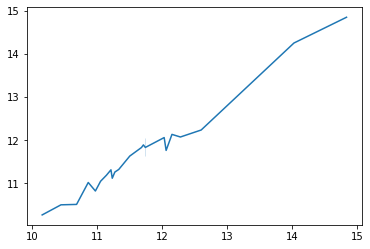

In [23]:
sns.lineplot(x=y_test, y=y_pred)

(array([10., 11., 12., 13., 14., 15., 16.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

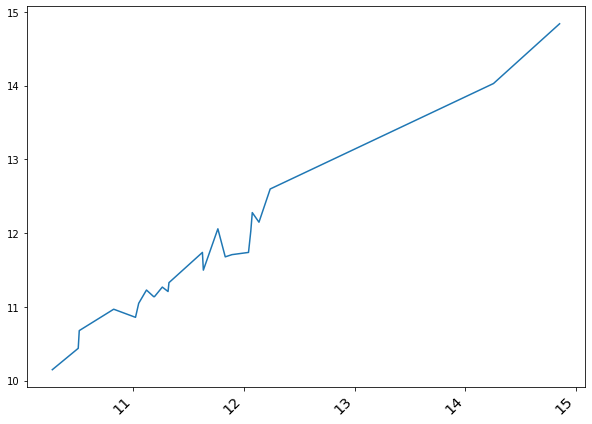

In [25]:
plt.figure(figsize=(10,7))

sns.lineplot(x=y_pred, y=y_test)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

#plt.xlabel('City')
#plt.ylabel('Density (people per square mile)')

In [36]:
y_pred[15]

12.062371819001479

In [37]:
y_test[15]

12.03

<AxesSubplot:>

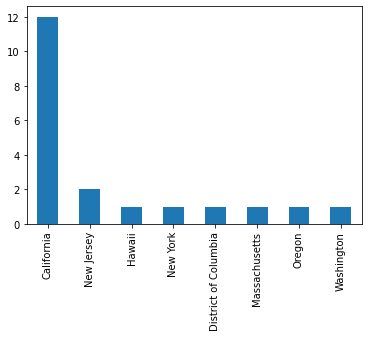

In [44]:
city_wage_data.sort_values('one_adult_no_kids_living_wage', ascending=False)[:20]['state'].value_counts().plot(kind='bar')

In [49]:
city_wage_data.sort_values('one_adult_no_kids_living_wage', ascending=False)[:20]

,rank_2020,city,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
9,10,San Jose,California,1013240,945942,178.3,5683,25.12,50.18,61.69,81.63,37.33,44.83,48.81,56.53,17.37,26.68,32.93,41.05
16,17,San Francisco,California,873965,805235,46.9,18635,22.88,48.61,60.41,80.09,35.48,42.97,46.95,54.12,16.23,25.89,32.29,40.28
44,45,Oakland,California,440646,390724,55.9,7883,22.88,48.61,60.41,80.09,35.48,42.97,46.95,54.12,16.23,25.89,32.29,40.28
65,66,Irvine,California,307670,212375,65.6,4690,22.44,45.36,55.85,74.15,34.10,41.01,44.99,52.08,17.05,24.26,30.01,37.31
63,64,Santa Ana,California,310227,324528,27.3,11364,22.44,45.36,55.85,74.15,34.10,41.01,44.99,52.08,17.05,24.26,30.01,37.31
95,96,Fremont,California,230504,214089,78.3,2944,21.88,46.59,58.15,76.92,34.27,41.18,45.16,51.65,17.14,24.88,31.16,38.69
77,78,Chula Vista,California,275487,243916,49.6,5554,21.26,42.97,52.44,69.51,32.45,39.67,43.64,50.54,16.23,23.07,28.30,34.99
54,55,Honolulu,Hawaii,350964,337256,60.5,5801,20.25,39.98,48.33,64.93,30.96,37.69,41.62,49.16,14.86,21.55,26.22,32.69
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40
61,62,Newark,New Jersey,311549,277140,24.1,12927,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40


Text(0, 0.5, 'Living Wage for One Adult with no Kids (in $)')

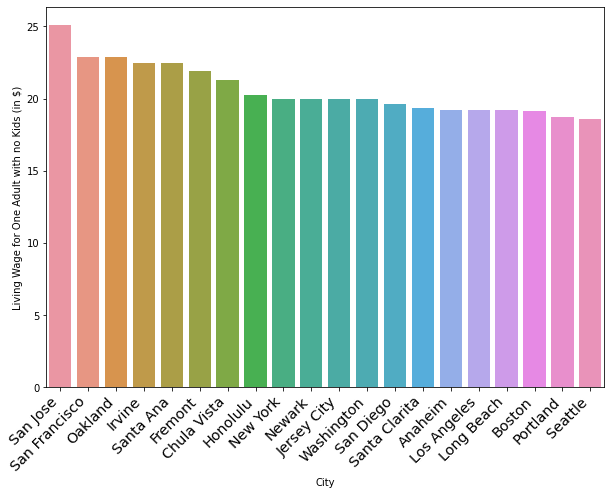

In [52]:
plt.figure(figsize=(10,7))

sns.barplot(x=city_wage_data.sort_values('one_adult_no_kids_living_wage', ascending=False)[:20]['city'], y=city_wage_data.sort_values('one_adult_no_kids_living_wage', ascending=False)[:20]['one_adult_no_kids_living_wage'])

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.xlabel('City')
plt.ylabel('Living Wage for One Adult with no Kids (in $)')

Text(0, 0.5, 'Living Wage for One Adult with no Kids (in $)')

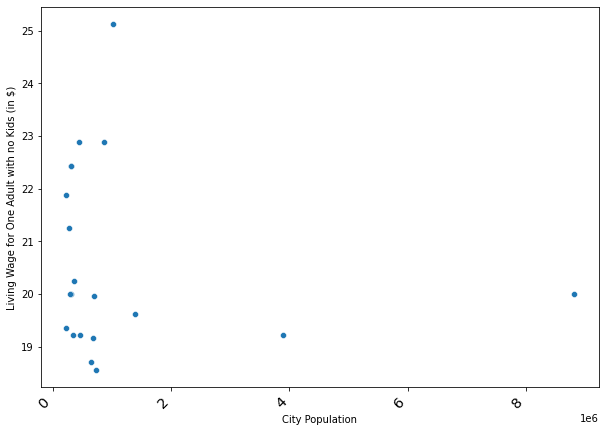

In [67]:
plt.figure(figsize=(10,7))

sns.scatterplot(x=city_wage_data.sort_values('one_adult_no_kids_living_wage', ascending=False)[:20]['population_2020'].values, y=city_wage_data.sort_values('one_adult_no_kids_living_wage', ascending=False)[:20]['one_adult_no_kids_living_wage'].values, legend=True)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

#for i in range(city_wage_data.shape[0]):
# plt.text(x=city_wage_data.sort_values('one_adult_no_kids_living_wage', ascending=False)[:20]['population_2020'].values[i],y=city_wage_data.sort_values('one_adult_no_kids_living_wage', ascending=False)[:20]['one_adult_no_kids_living_wage'].values[i],s=city_wage_data['city'][i])

plt.xlabel('City Population')
plt.ylabel('Living Wage for One Adult with no Kids (in $)')